This file is a playground/sanbox for implementing linear chirp visualization using scipy

In [2]:
!pip install scipy==1.7.1

     |████████████████████████████████| 28.5 MB 89.8 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Function to plot spectrogram

def plot_spectrogram(title, w, fs):
    # ff, tt, Sxx = signal.spectrogram(w, fs=fs, nperseg=256, nfft=576)
    # plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.specgram(w,Fs=fs)
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

In [ ]:
# Timebox -> 1 hour to implement matching filter with SciPy

SAMPLE_RATE = 44100
CHIRP_LENGTH = 0.1

# 1. Generate linear chirp
t = np.linspace(0, CHIRP_LENGTH, int(SAMPLE_RATE * CHIRP_LENGTH))
w = signal.chirp(t, f0 = 11000, f1 = 22000, t1=CHIRP_LENGTH, method='linear')

# 2. Visualize linear chirp on frequency v/s time graph
plot_spectrogram("Linear Chirp", w, SAMPLE_RATE)

# 3. Compare chirp to matlab-generated chirp
# Converting to int16 range
clean_signal = w * np.iinfo(np.int16).max
wavfile.write("py_chirp.wav", SAMPLE_RATE, clean_signal.astype(np.int16))

# 4. If same, use existing recordings, else take 3 new recordings
noisy_signal = clean_signal

# 5. Implement matching filter
corr = signal.correlate(noisy_signal, clean_signal, mode='same')
plt.plot(np.linspace(0, CHIRP_LENGTH, len(corr)), corr)
# plt.plot(t, corr)
plt.show()

In [ ]:
from scipy.io import wavfile

sampFreq, x = wavfile.read('16_C.wav')
sig_OG = x[:,0]

sameFreq2, y = wavfile.read('test.wav')
sig_noise = y[:, 0]
sig_noise = y[len(sig_noise) - len(sig_OG):,0]

signn = sig_OG + rng.standard_normal(len(sig_OG))


corr = signal.correlate(sig_noise, sig_OG)
lags = signal.correlation_lags(len(sig_OG), len(sig_noise))
print(np.max(corr))

maxim = np.max(corr)
for i in range(len(corr)):
  corr[i] = corr[i]/maxim


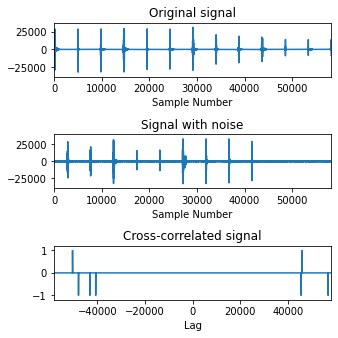

In [ ]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig_OG)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)

ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)

ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()